In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  
pd.options.display.float_format = '{:.3f}'.format

os.listdir('./data')

In [7]:
df = pd.read_csv('./data/data.csv', encoding='CP949')
df = df.sort_values(by='시간').reset_index(drop=True)
df.head()

,시간,호선,역번호,역명,상하구분,AWS지점코드,기온,풍향,풍속,일강수량,시간강수량,상대습도,일사량,체감온도,혼잡도,승차총승객수,하차총승객수,미세먼지
0,2021-01-01 00:00:00,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0.0,15284.0,16731.0,25.0
1,2021-01-01 00:00:00,1,1903,도봉산,하선,406,-8.5,7.6,0.7,0.0,0.0,66.4,-99.0,-8.9,0.0,6483.0,6500.0,25.0
2,2021-01-01 00:00:00,2,236,영등포구청,외선,510,-6.5,318.3,1.2,0.0,0.0,-99.0,-99.0,-9.4,0.0,4319.0,4218.0,25.0
3,2021-01-01 00:00:00,6,2621,마포구청,하선,411,-8.1,306.6,3.0,0.0,0.0,62.8,-99.0,-10.3,0.0,3604.0,3230.0,25.0
4,2021-01-01 00:00:00,7,2731,청담,상선,413,-6.4,314.2,1.4,0.0,0.0,52.6,-99.0,-7.0,0.0,3080.0,3164.0,25.0


In [9]:
#-- 파생변수 생성

df['날짜'] = pd.to_datetime(df['시간'])
df['년'] = pd.to_datetime(df['시간']).dt.year
df['월'] = pd.to_datetime(df['시간']).dt.month
df['시간'] = pd.to_datetime(df['시간']).dt.hour
df['시간_sin'] = np.sin(2 * np.pi * df['시간'] / 24)
df['시간_cos'] = np.cos(2 * np.pi * df['시간'] / 24)
df['미세먼지_level'] = np.where(df['미세먼지'] >= 151, '매우나쁨',
                    np.where(df['미세먼지'] >= 81, '나쁨',
                    np.where(df['미세먼지'] >= 31, '보통',
                    np.where(df['미세먼지'] >= 0, '좋음', None))))

#-- 데이터 타입 변경
# 데이터 용령 줄이기 위해
# 미세먼지_level(109), 호선(8), 역번호(363), 역명(313), 상하구분(4)은 범주형으로 변경
# AWS지점코드 년 월 시간은 'int32'

categorical_col = '미세먼지_level 호선 역번호 역명 상하구분'.split()
int_col = 'AWS지점코드 년 월 시간'.split()

df[categorical_col] = df[categorical_col].astype('category')
df[int_col] = df[int_col].astype('int32')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15653610 entries, 0 to 15653609
Data columns (total 24 columns):
 #   Column      Dtype         
---  ------      -----         
 0   시간          int32         
 1   호선          category      
 2   역번호         category      
 3   역명          category      
 4   상하구분        category      
 5   AWS지점코드     int32         
 6   기온          float64       
 7   풍향          float64       
 8   풍속          float64       
 9   일강수량        float64       
 10  시간강수량       float64       
 11  상대습도        float64       
 12  일사량         float64       
 13  체감온도        float64       
 14  혼잡도         float64       
 15  승차총승객수      float64       
 16  하차총승객수      float64       
 17  미세먼지        float64       
 18  날짜          datetime64[ns]
 19  년           int32         
 20  월           int32         
 21  시간_sin      float64       
 22  시간_cos      float64       
 23  미세먼지_level  category      
dtypes: category(5), datetime64[ns](1), float64(14), 

In [5]:
for c in df.columns:
    print(c,' : ',df[c].nunique())

시간  :  21
호선  :  8
역번호  :  363
역명  :  313
상하구분  :  4
AWS지점코드  :  48
기온  :  617
풍향  :  3603
풍속  :  131
일강수량  :  1154
시간강수량  :  325
상대습도  :  951
일사량  :  377
체감온도  :  632
혼잡도  :  250
승차총승객수  :  53855
하차총승객수  :  54587
미세먼지  :  109
날짜  :  1080
년  :  3
월  :  12
시간_sin  :  20
시간_cos  :  20
미세먼지_level  :  4


In [6]:
print('df.shape: ', df.shape)

df.shape:  (15653610, 24)


In [13]:
list_99 = []
for col in df.columns:
    cond = df[col] == -99
    if df.loc[cond, col].shape[0] != 0:
        print(col, ':', df.loc[cond, col].shape[0]/df.shape[0]*100, '%')
        list_99.append(col)

기온 : 1.351803194279147 %
풍향 : 1.4203113531000198 %
풍속 : 1.4203113531000198 %
일강수량 : 2.186984344186421 %
시간강수량 : 2.2419237479405707 %
상대습도 : 5.361791944477983 %
일사량 : 37.061355176218136 %
체감온도 : 0.002223129361214442 %


- 미측정값

In [14]:
for col in list_99:
    cond = df[col] == 0
    if df.loc[cond, col].shape[0] != 0:
        print(col, ':', df.loc[cond, col].shape[0]/df.shape[0]*100, '%')

기온 : 0.19355279708642287 %
풍향 : 2.304618551247923 %
풍속 : 3.0980585309075668 %
일강수량 : 80.15183718004984 %
시간강수량 : 92.06834717359126 %
일사량 : 3.0349804294344884 %
체감온도 : 0.3178308390205199 %


-> 상대습도는 0일 수 없음
-> 나머지는 0인 게 존재함

측정이 되지 않은 값 -99 존재 -> 결측치 삽입

In [16]:
# -99를 NaN으로 처리
for col in '기온 풍향 풍속 일강수량 시간강수량 상대습도 일사량 체감온도'.split():
    df[col] = df[col].replace(-99, np.nan)

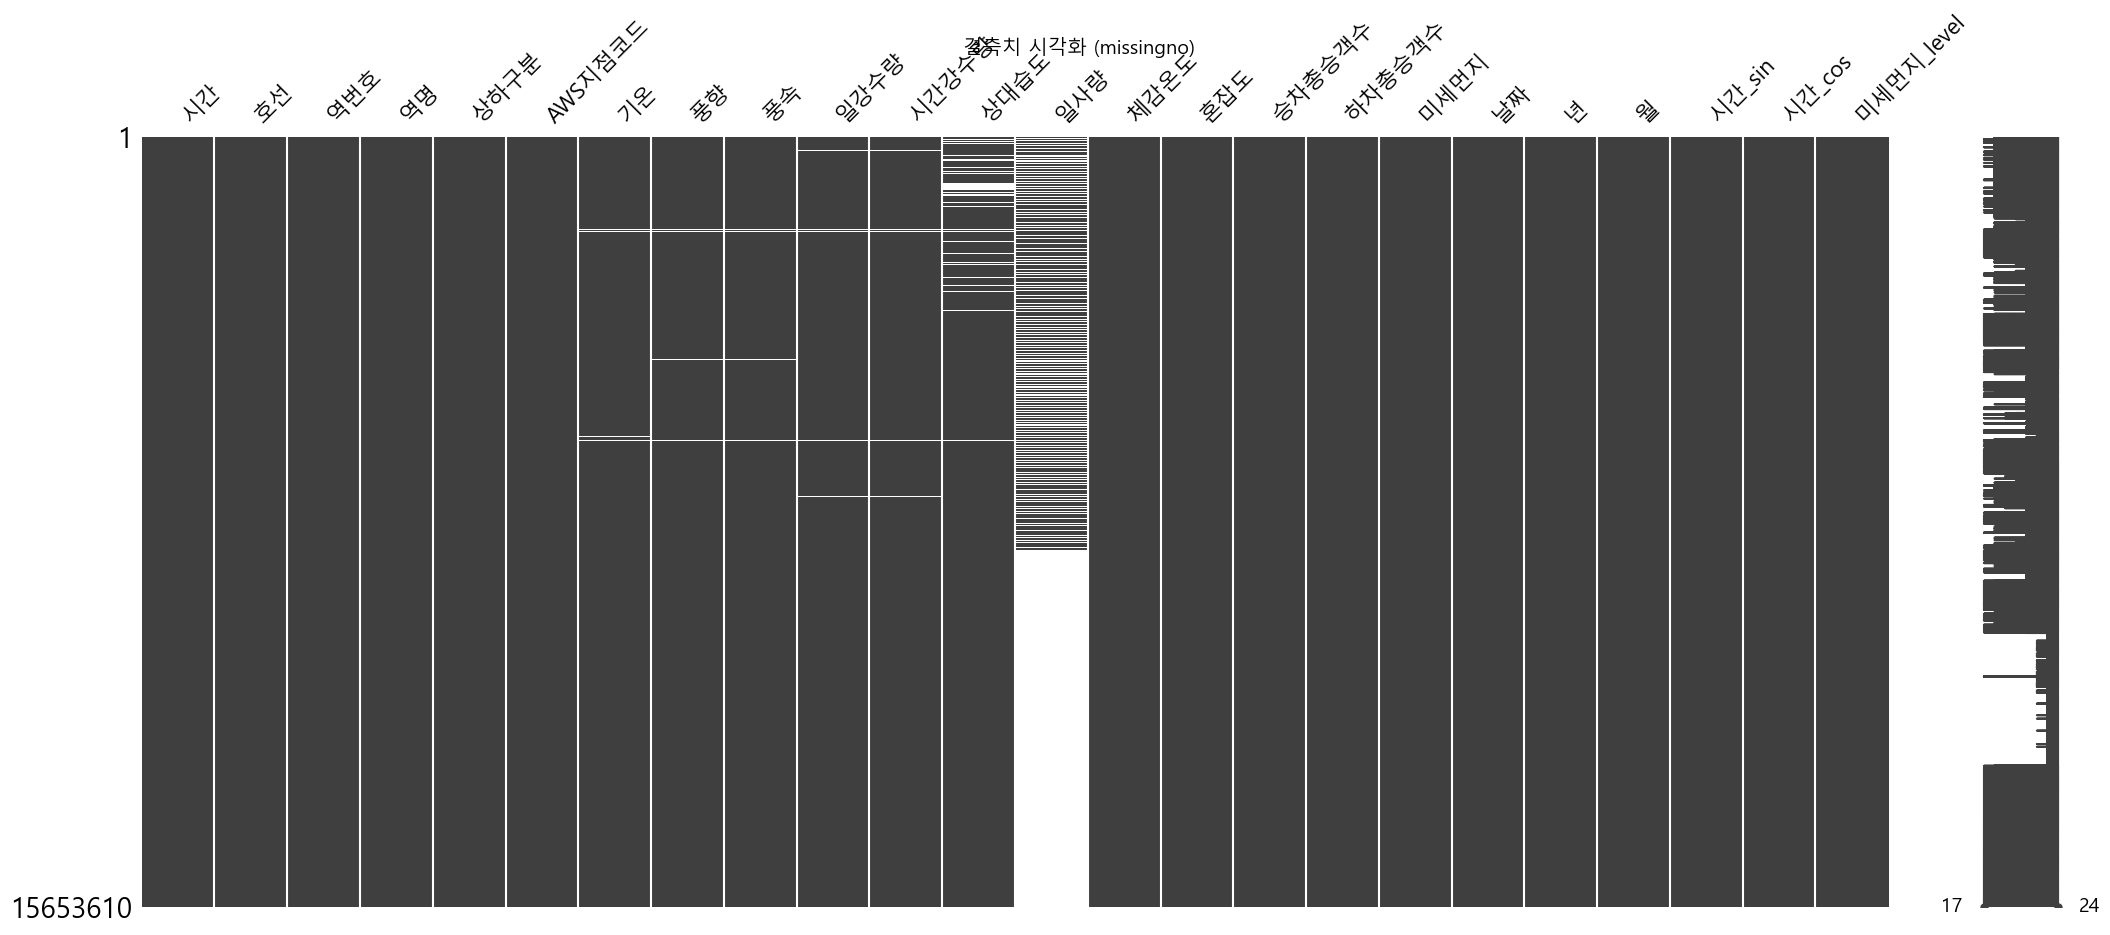

In [17]:
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# 시간 정렬 (선택사항)
df = df.sort_values(by='날짜')

# missingno matrix 시각화
msno.matrix(df)
plt.suptitle('결측치 시각화 (missingno)', fontsize=14)
plt.show()

- 측정이 안 된 값은 시계열적으로 고르게 분포하는가? -> 날짜, 시간, 월

In [39]:
# 결측치 삽입
cond = df['시간'].isin([21, 22, 23, 0, 1, 5])
#df.loc[cond, '일사량']=0

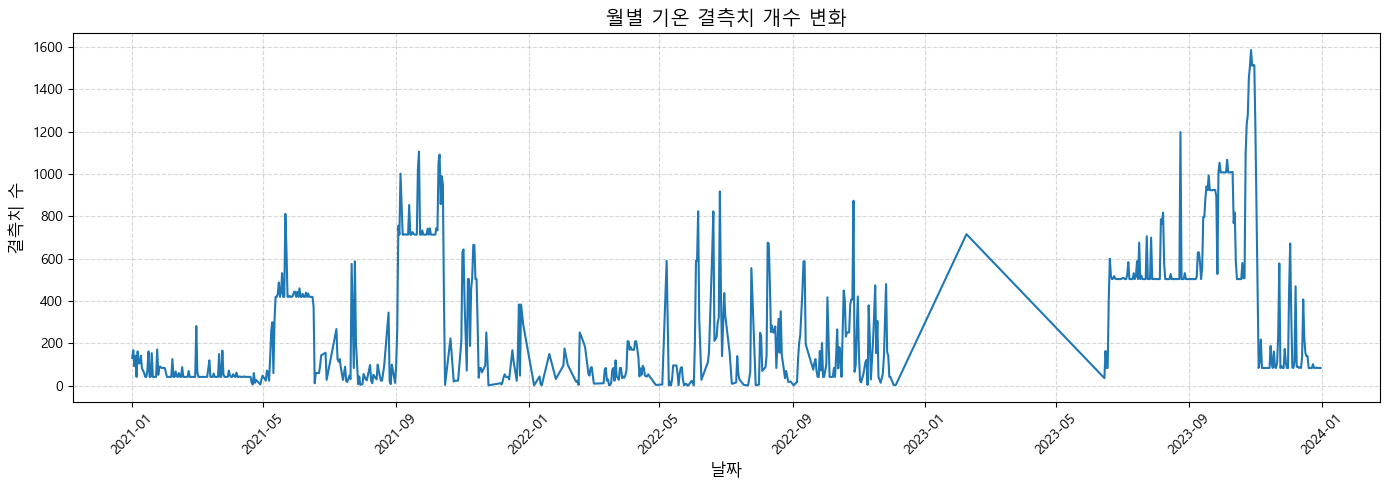

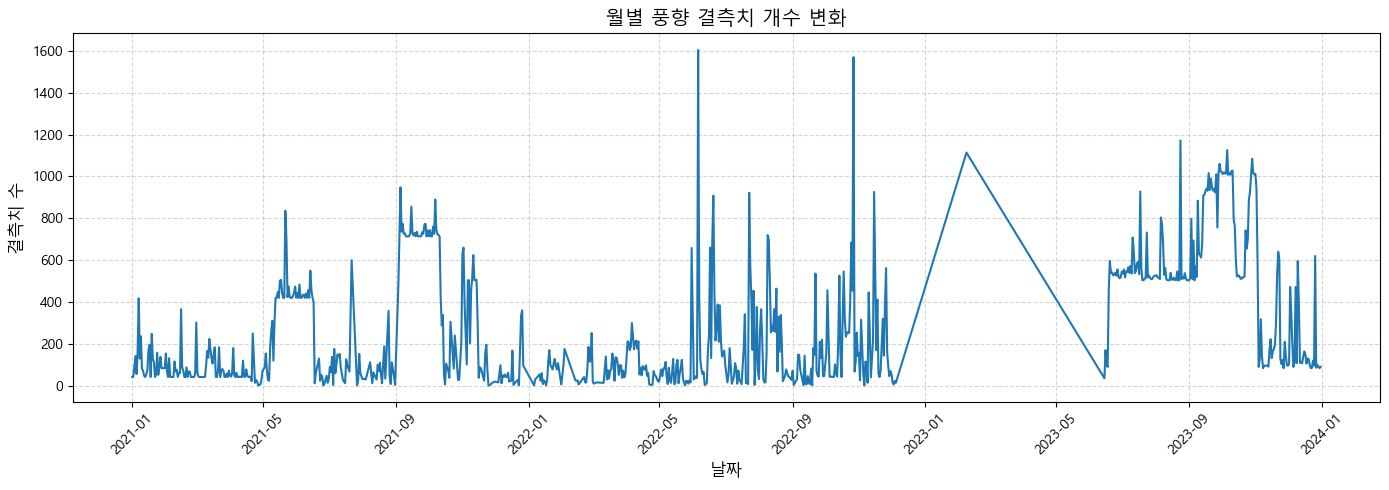

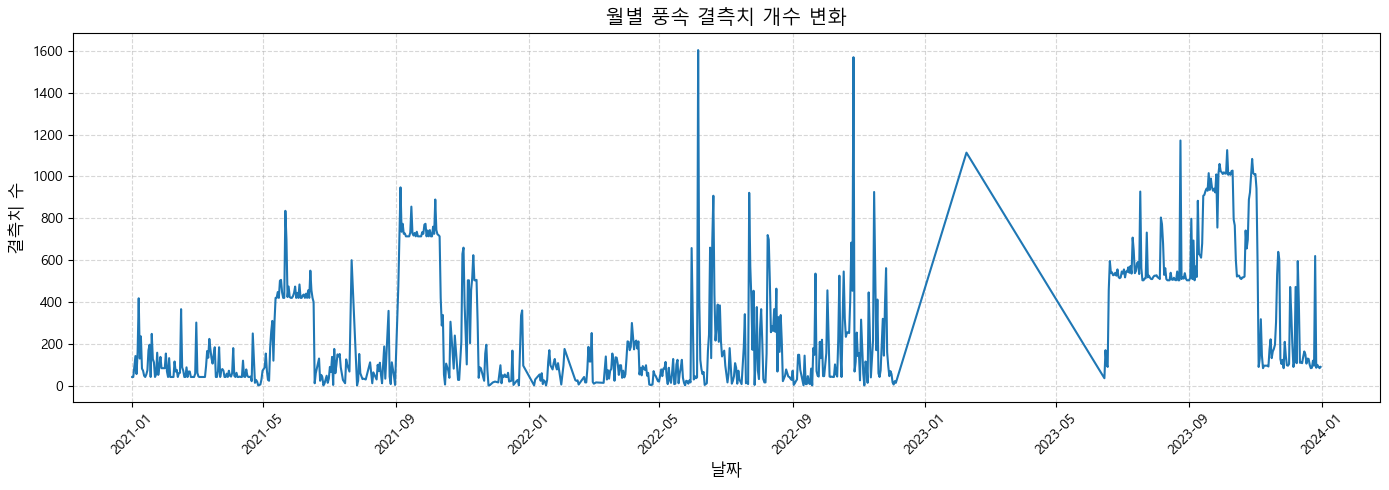

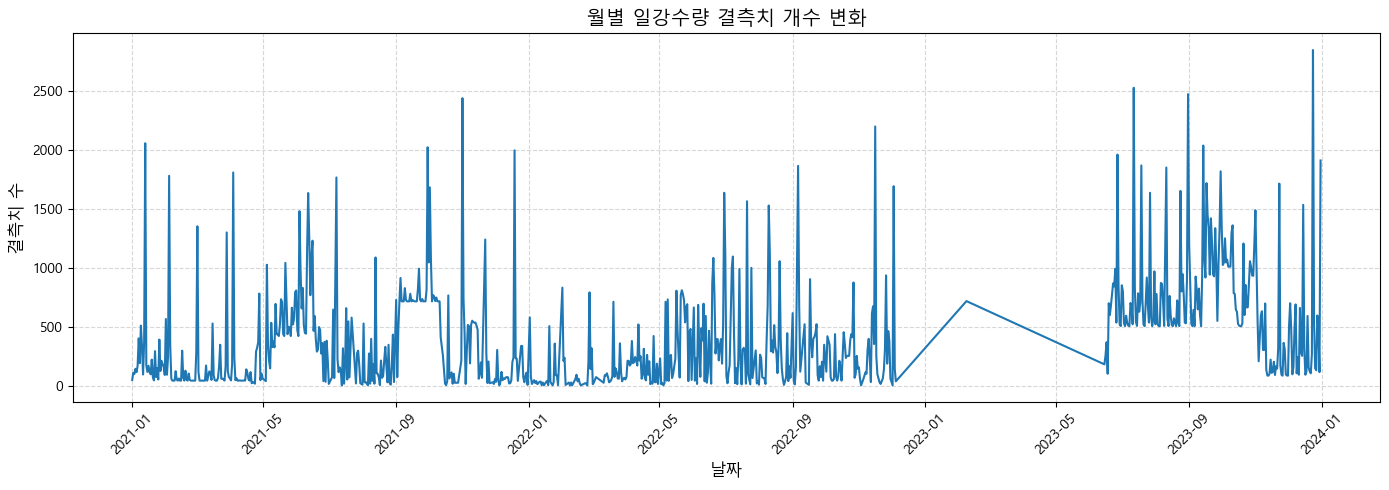

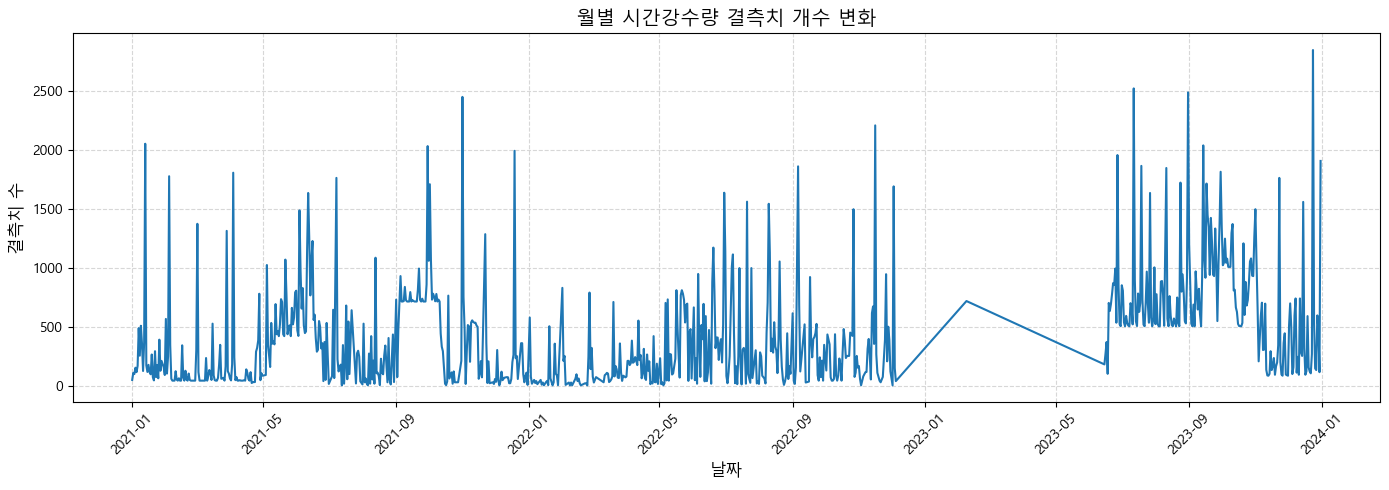

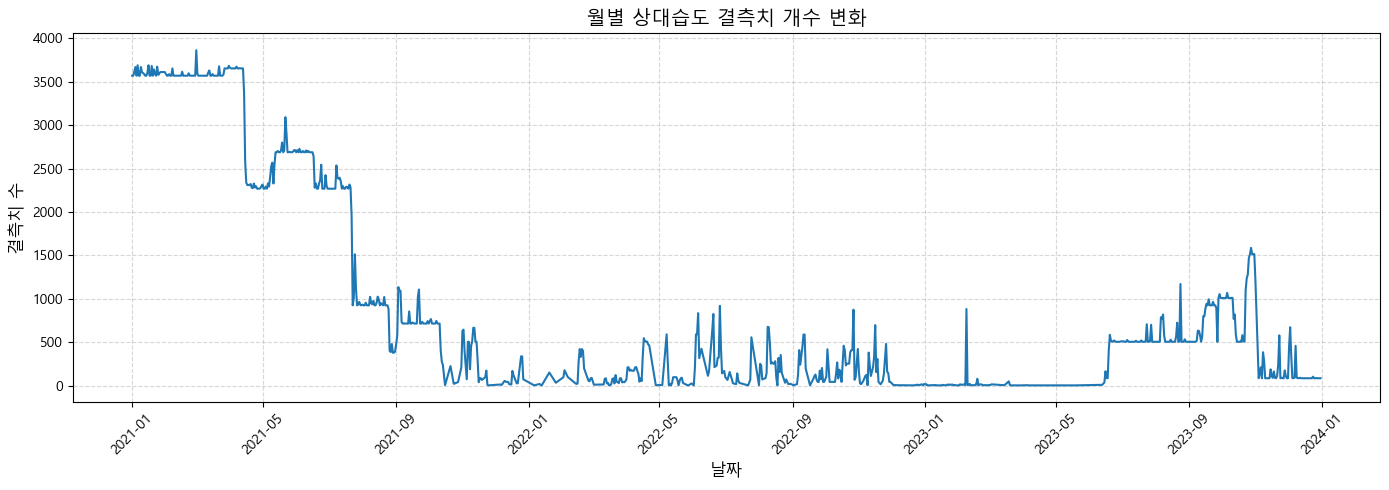

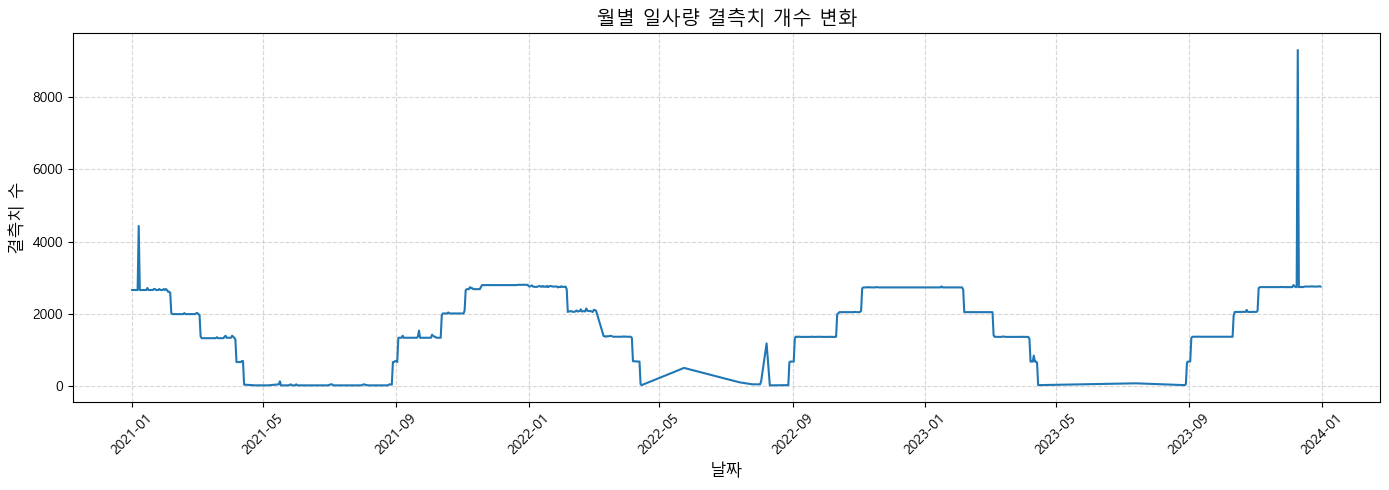

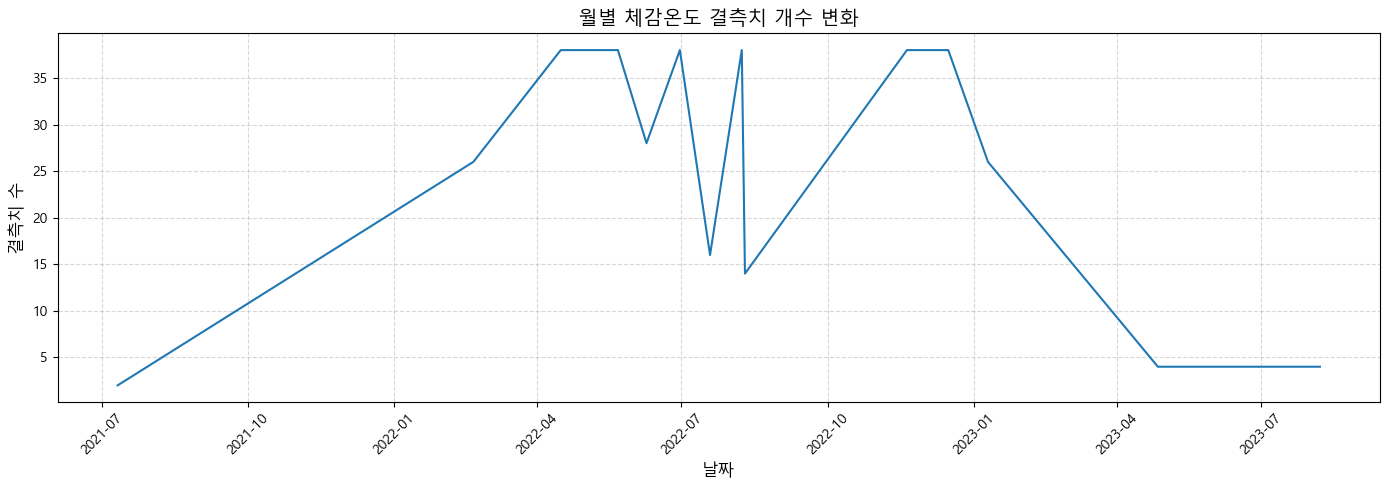

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 날짜 컬럼이 datetime 형식이 아니라면 변환

for col in '기온 풍향 풍속 일강수량 시간강수량 상대습도 일사량 체감온도'.split():
    cond = df[col].isna()
    tab = df.loc[cond, :]
    
    # 날짜를 월 단위로 리샘플링하여 결측치 수 계산
    monthly_missing = tab.groupby('날짜')[col].size()
    
    # 시각화
    plt.figure(figsize=(14, 5))
    plt.plot(monthly_missing.index, monthly_missing.values, linestyle='-')
    plt.title(f'월별 {col} 결측치 개수 변화', fontsize=14)
    plt.xlabel('날짜', fontsize=12)
    plt.ylabel('결측치 수', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [44]:
col = '기온 풍향 풍속'.split()
df[df[col].isna().all(axis=1)].shape[0], df[df['기온'].isna()].shape[0], df[df['풍향'].isna()].shape[0], df[df['풍속'].isna()].shape[0]

(185444, 211606, 222330, 222330)

In [54]:
col = '풍향 풍속'.split()
df[df[col].isna().all(axis=1)].shape[0], df[df['풍향'].isna()].shape[0], df[df['풍속'].isna()].shape[0]

(222330, 222330, 222330)

In [45]:
col = '일강수량 시간강수량'.split()
df[df[col].isna().all(axis=1)].shape[0], df[df['일강수량'].isna()].shape[0], df[df['시간강수량'].isna()].shape[0]

(342290, 342342, 350942)

- 기온, 풍향, 풍속 분포 비슷 -> 21만 건 중 18만 건 정도가 일치함, 풍향과 풍속은 세트
- 일강수량, 시간강수량 분포 비슷 -> 대부분 일치
- 상대습도 이리사량 체감온도 별개

In [46]:
df['날짜']#.resample('M')

0          2021-01-01
1          2021-01-01
2          2021-01-01
3          2021-01-01
4          2021-01-01
              ...    
15653605   2023-12-31
15653606   2023-12-31
15653607   2023-12-31
15653608   2023-12-31
15653609   2023-12-31
Name: 날짜, Length: 15653610, dtype: datetime64[ns]

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def consecutive_nan_lengths(series):
    is_nan = series.isna()
    nan_groups = is_nan.groupby((~is_nan).cumsum()).sum()
    return nan_groups[nan_groups > 0]  # 연속 결측 구간만 추출

for col in '기온 풍향 풍속 일강수량 시간강수량 상대습도 일사량 체감온도'.split():
    nan_streaks = consecutive_nan_lengths(df[col])

    q25 = nan_streaks.quantile(0.25)
    q50 = nan_streaks.quantile(0.50)
    q75 = nan_streaks.quantile(0.75)
    qmax = nan_streaks.max()

    print(f"[{col}] 연속 결측치 길이")
    print(f"  - 25% : {q25}")
    print(f"  - 50% (중앙값): {q50}")
    print(f"  - 75% : {q75}")
    print(f"  - max : {qmax}\n")

[기온] 연속 결측치 길이
  - 25% : 1.0
  - 50% (중앙값): 1.0
  - 75% : 1.0
  - max : 94

[풍향] 연속 결측치 길이
  - 25% : 1.0
  - 50% (중앙값): 1.0
  - 75% : 1.0
  - max : 684

[풍속] 연속 결측치 길이
  - 25% : 1.0
  - 50% (중앙값): 1.0
  - 75% : 1.0
  - max : 684

[일강수량] 연속 결측치 길이
  - 25% : 1.0
  - 50% (중앙값): 1.0
  - 75% : 1.0
  - max : 94

[시간강수량] 연속 결측치 길이
  - 25% : 1.0
  - 50% (중앙값): 1.0
  - 75% : 1.0
  - max : 94

[상대습도] 연속 결측치 길이
  - 25% : 1.0
  - 50% (중앙값): 1.0
  - 75% : 1.0
  - max : 94

[일사량] 연속 결측치 길이
  - 25% : 2.0
  - 50% (중앙값): 11.0
  - 75% : 28.0
  - max : 1436

[체감온도] 연속 결측치 길이
  - 25% : 1.0
  - 50% (중앙값): 1.0
  - 75% : 1.0
  - max : 2



In [67]:
np.unique(df['날짜'], return_counts=True)
# 하루의 데이터가 1만 5천건 집계
# 그러면 최대 길이가 1436여도 보간법으로 채운다면 같은 일자일 것. 

(array(['2021-01-01T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
        '2021-01-03T00:00:00.000000000', ...,
        '2023-12-29T00:00:00.000000000', '2023-12-30T00:00:00.000000000',
        '2023-12-31T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([14574, 14574, 14574, ..., 14490, 14532, 14490], dtype=int64))

### ✅ 선형보간법 채택 근거

---

#### ✅ 상황 요약
- `df['날짜']`의 고유값과 빈도 분포를 보면:
  - 하루에 약 **15,000건**씩 데이터가 수집됨
  - 즉, **매일 수천 개의 데이터가 시간 단위로 촘촘히 존재**
- 결측치의 **최대 연속 길이: 1436건**
  - 이는 하루 데이터의 약 **10% 수준**
  - → 동일 일자 내의 연속 누락일 가능성이 높음

---

#### ✅ 결론: 보간법 적용이 타당한 이유

| 판단 요소 | 설명 |
|-----------|------|
| ✅ 시간 순서가 잘 정렬됨 | → 선형 보간은 시계열 구조에서 **순서가 보장될 때** 유효 |
| ✅ 결측 길이 ≒ 동일 일자 내 | → 기상 데이터는 하루 **주기적 특성**을 가지므로, 당일 값으로 보간해도 무리 없음 |
| ✅ LSTM 사용 예정 | → 딥러닝 모델은 **자동으로 피처를 학습**하므로, 약간의 보간 왜곡은 흡수 가능 |
| ✅ 대부분 연속 결측 구간이 짧음 | → **단기 결측**은 선형 보간으로 자연스럽게 채울 수 있음 |

In [19]:
# 이미 결측치 구간 분석 결과:
# - 대부분 변수: max 1000건 미만 → 하루 내 결측으로 판단 가능
# - 따라서 전체 보간 구간을 조건 없이 선형보간으로 채움

df = df.sort_values('날짜').set_index('날짜')

# 선형 보간 적용
columns_to_fill = ['기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도']
df[columns_to_fill] = df[columns_to_fill].interpolate(method='linear', limit_direction='both')
df.isna().sum()

시간            0
호선            0
역번호           0
역명            0
상하구분          0
AWS지점코드       0
기온            0
풍향            0
풍속            0
일강수량          0
시간강수량         0
상대습도          0
일사량           0
체감온도          0
혼잡도           0
승차총승객수        0
하차총승객수        0
미세먼지          0
년             0
월             0
시간_sin        0
시간_cos        0
미세먼지_level    0
dtype: int64

# 결측치 채운 뒤, EDA

공휴일 여부, 태풍, 한파, 폭염 추가 

In [66]:
from holidayskr import year_holidays

# 2021년의 모든 공휴일 조회
holidays = year_holidays('2021')
for holiday, holiday_name in holidays:
    print(f"{holiday.strftime('%Y년 %m월 %d일')}은 {holiday_name}입니다.")
# 2022년의 모든 공휴일 조회
holidays = year_holidays('2022')
for holiday, holiday_name in holidays:
    print(f"{holiday.strftime('%Y년 %m월 %d일')}은 {holiday_name}입니다.")
# 2023년의 모든 공휴일 조회
holidays = year_holidays('2023')
for holiday, holiday_name in holidays:
    print(f"{holiday.strftime('%Y년 %m월 %d일')}은 {holiday_name}입니다.")

2021년 01월 01일은 신정입니다.
2021년 02월 11일은 설날 전날입니다.
2021년 02월 12일은 설날입니다.
2021년 02월 13일은 설날 다음날입니다.
2021년 03월 01일은 3·1절입니다.
2021년 05월 01일은 근로자의 날입니다.
2021년 05월 05일은 어린이날입니다.
2021년 05월 19일은 석가탄신일입니다.
2021년 06월 06일은 현충일입니다.
2021년 08월 15일은 광복절입니다.
2021년 09월 20일은 추석 전날입니다.
2021년 09월 21일은 추석입니다.
2021년 09월 22일은 추석 다음날입니다.
2021년 10월 03일은 개천절입니다.
2021년 10월 09일은 한글날입니다.
2021년 12월 25일은 크리스마스입니다.
2022년 01월 01일은 신정입니다.
2022년 01월 31일은 설날 전날입니다.
2022년 02월 01일은 설날입니다.
2022년 02월 02일은 설날 다음날입니다.
2022년 03월 01일은 3·1절입니다.
2022년 05월 01일은 근로자의 날입니다.
2022년 05월 05일은 어린이날입니다.
2022년 05월 08일은 석가탄신일입니다.
2022년 06월 06일은 현충일입니다.
2022년 08월 15일은 광복절입니다.
2022년 09월 09일은 추석 전날입니다.
2022년 09월 10일은 추석입니다.
2022년 09월 11일은 추석 다음날입니다.
2022년 10월 03일은 개천절입니다.
2022년 10월 09일은 한글날입니다.
2022년 12월 25일은 크리스마스입니다.
2023년 01월 01일은 신정입니다.
2023년 01월 21일은 설날 전날입니다.
2023년 01월 22일은 설날입니다.
2023년 01월 23일은 설날 다음날입니다.
2023년 03월 01일은 3·1절입니다.
2023년 05월 01일은 근로자의 날입니다.
2023년 05월 05일은 어린이날입니다.
2023년 05월 27일은 석가탄신일입니다.
2023년 06월 06일은 현충일입니다.
2023년 08월 15일은 

In [ ]:
# 휴일여부 컬럼 생성
df['연월일'] = df.index.date
df['연월일'] = pd.to_datetime(df['연월일'])
df['요일'] = df['연월일'].dt.dayofweek

dates_only1 = [d[0] for d in year_holidays('2021')]
dates_only2 = [d[0] for d in year_holidays('2022')]
dates_only3 = [d[0] for d in year_holidays('2023')]

cond1 = df['요일'].isin([5,6])
cond2 = df['연월일'].isin(dates_only1)
cond3 = df['연월일'].isin(dates_only2)
cond4 = df['연월일'].isin(dates_only3)

cond_total = cond1 | cond2 | cond3 | cond4
df['휴일여부'] = cond_total.astype(int)

In [103]:
df = df[['연월일','년','월','시간', '시간_sin', '시간_cos',
    '호선', '역번호', '역명', '상하구분', 'AWS지점코드', '기온', '풍향', '풍속'
    , '일강수량',
   '시간강수량', '상대습도', '일사량', '체감온도', '혼잡도', '승차총승객수', '하차총승객수', '미세먼지', 
    '미세먼지_level',  '요일', '휴일여부']]
df.to_csv('data2.csv')

# 피처 제거

✅ 피처 제거를 위해 해야 할 단계 요약
1. 통계 기반 분석
2. 제거 기준 설정
- 상관계수 절대값이 0.1 미만
- 다중공선성 높은 컬럼 (VIF > 10)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# 예시: 수치형 변수만 추출 (원핫이나 범주형 제외)
tab = df.dropna()
numeric_df = tab.select_dtypes(np.number)

# 상수항 추가 (필수)
X = add_constant(numeric_df)

# VIF 계산
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 상수항 제거
vif_df = vif_df[vif_df['feature'] != 'const']

# 출력
print(vif_df.sort_values(by='VIF', ascending=False))

    feature     VIF
12   승차총승객수 165.174
13   하차총승객수 165.156
10     체감온도  90.621
3        기온  88.652
9       일사량   3.188
17   시간_sin   2.564
18   시간_cos   2.490
8      상대습도   2.414
1        시간   2.158
6      일강수량   1.431
7     시간강수량   1.314
11      혼잡도   1.296
5        풍속   1.267
16        월   1.145
14     미세먼지   1.118
4        풍향   1.094
2   AWS지점코드   1.091
15        년   1.040


시간_cos는 낮일수록 음수, 밤일수록 양수 → 일사량과 반대 방향으로 잘 맞물림 → 음의 상관관계

시간_sin은 일사량의 변화와 위상이 맞지 않음 → 상관관계 낮음

In [22]:
df[list_99] = np.where(df[list_99]==-99, 0, df[list_99])

In [24]:
list_99 = []
for col in df.columns:
    cond = df[col] == -99
    if df.loc[cond, col].shape[0] != 0:
        print(col, ':', df.loc[cond, col].shape[0]/df.shape[0]*100, '%')
        list_99.append(col)

In [27]:
# cor = df.drop(columns=['상하구분','역명'])
# cor.corr()['혼잡도'].sort_values()

In [47]:
cor = df.drop(columns=['상하구분','역명'])
cor.corr()['혼잡도'].sort_values()

상대습도      -0.127417
역번호       -0.103018
일사량       -0.072930
일강수량      -0.008435
호선        -0.006924
시간강수량     -0.006236
풍향         0.039668
풍속         0.057138
체감온도       0.059867
기온         0.071683
AWS지점코드    0.104984
혼잡도        1.000000
Name: 혼잡도, dtype: float64